<a href="https://www.kaggle.com/code/gonendavidi/appliedml-ex1?scriptVersionId=98005299" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

!pip install dtreeviz

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import random

from dtreeviz.trees import *


from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score
from sklearn import tree


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


1. Upload data set
2. data analysis
3. clean the data
4. feature selection
5. 
 

In [23]:
my_data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
my_data.reset_index(drop=True, inplace=True)
# my_data.drop(['Date'],inplace=True,axis=1)
my_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [24]:
print(my_data.dtypes)
my_data.describe()

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [25]:
print("number of missing values for each feature:")
print(my_data.isna().sum())
print("\nnumber of duplicate raws in the data set:")
print(my_data.duplicated().sum())

number of missing values for each feature:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

number of duplicate raws in the data set:
0


In [26]:
my_data.drop_duplicates(inplace=True)
my_data.dropna(inplace=True)

print("number of missing values for each feature:")
print(my_data.isna().sum())
print("\nnumber of duplicate raws in the data set:")
print(my_data.duplicated().sum())
my_data.shape

number of missing values for each feature:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

number of duplicate raws in the data set:
0


(56420, 23)

In [27]:
my_data['Date'] = my_data['Date'].apply(lambda x: int(x.split('-')[1]))
my_data['Date']

6049      1
6050      1
6052      1
6053      1
6054      1
         ..
142298    6
142299    6
142300    6
142301    6
142302    6
Name: Date, Length: 56420, dtype: int64

In [28]:
numerical= my_data.drop(['RainTomorrow'], axis=1).select_dtypes('number').columns

categorical = my_data.select_dtypes('object').columns

print(f'Numerical Columns:  {my_data[numerical].columns}')
print('\n')
print(f'Categorical Columns: {my_data[categorical].columns}')

Numerical Columns:  Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


Categorical Columns: Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [29]:
pd.options.plotting.backend = "plotly"
my_data[numerical].plot(kind='hist')

In [30]:
my_data[categorical].plot(kind='hist')

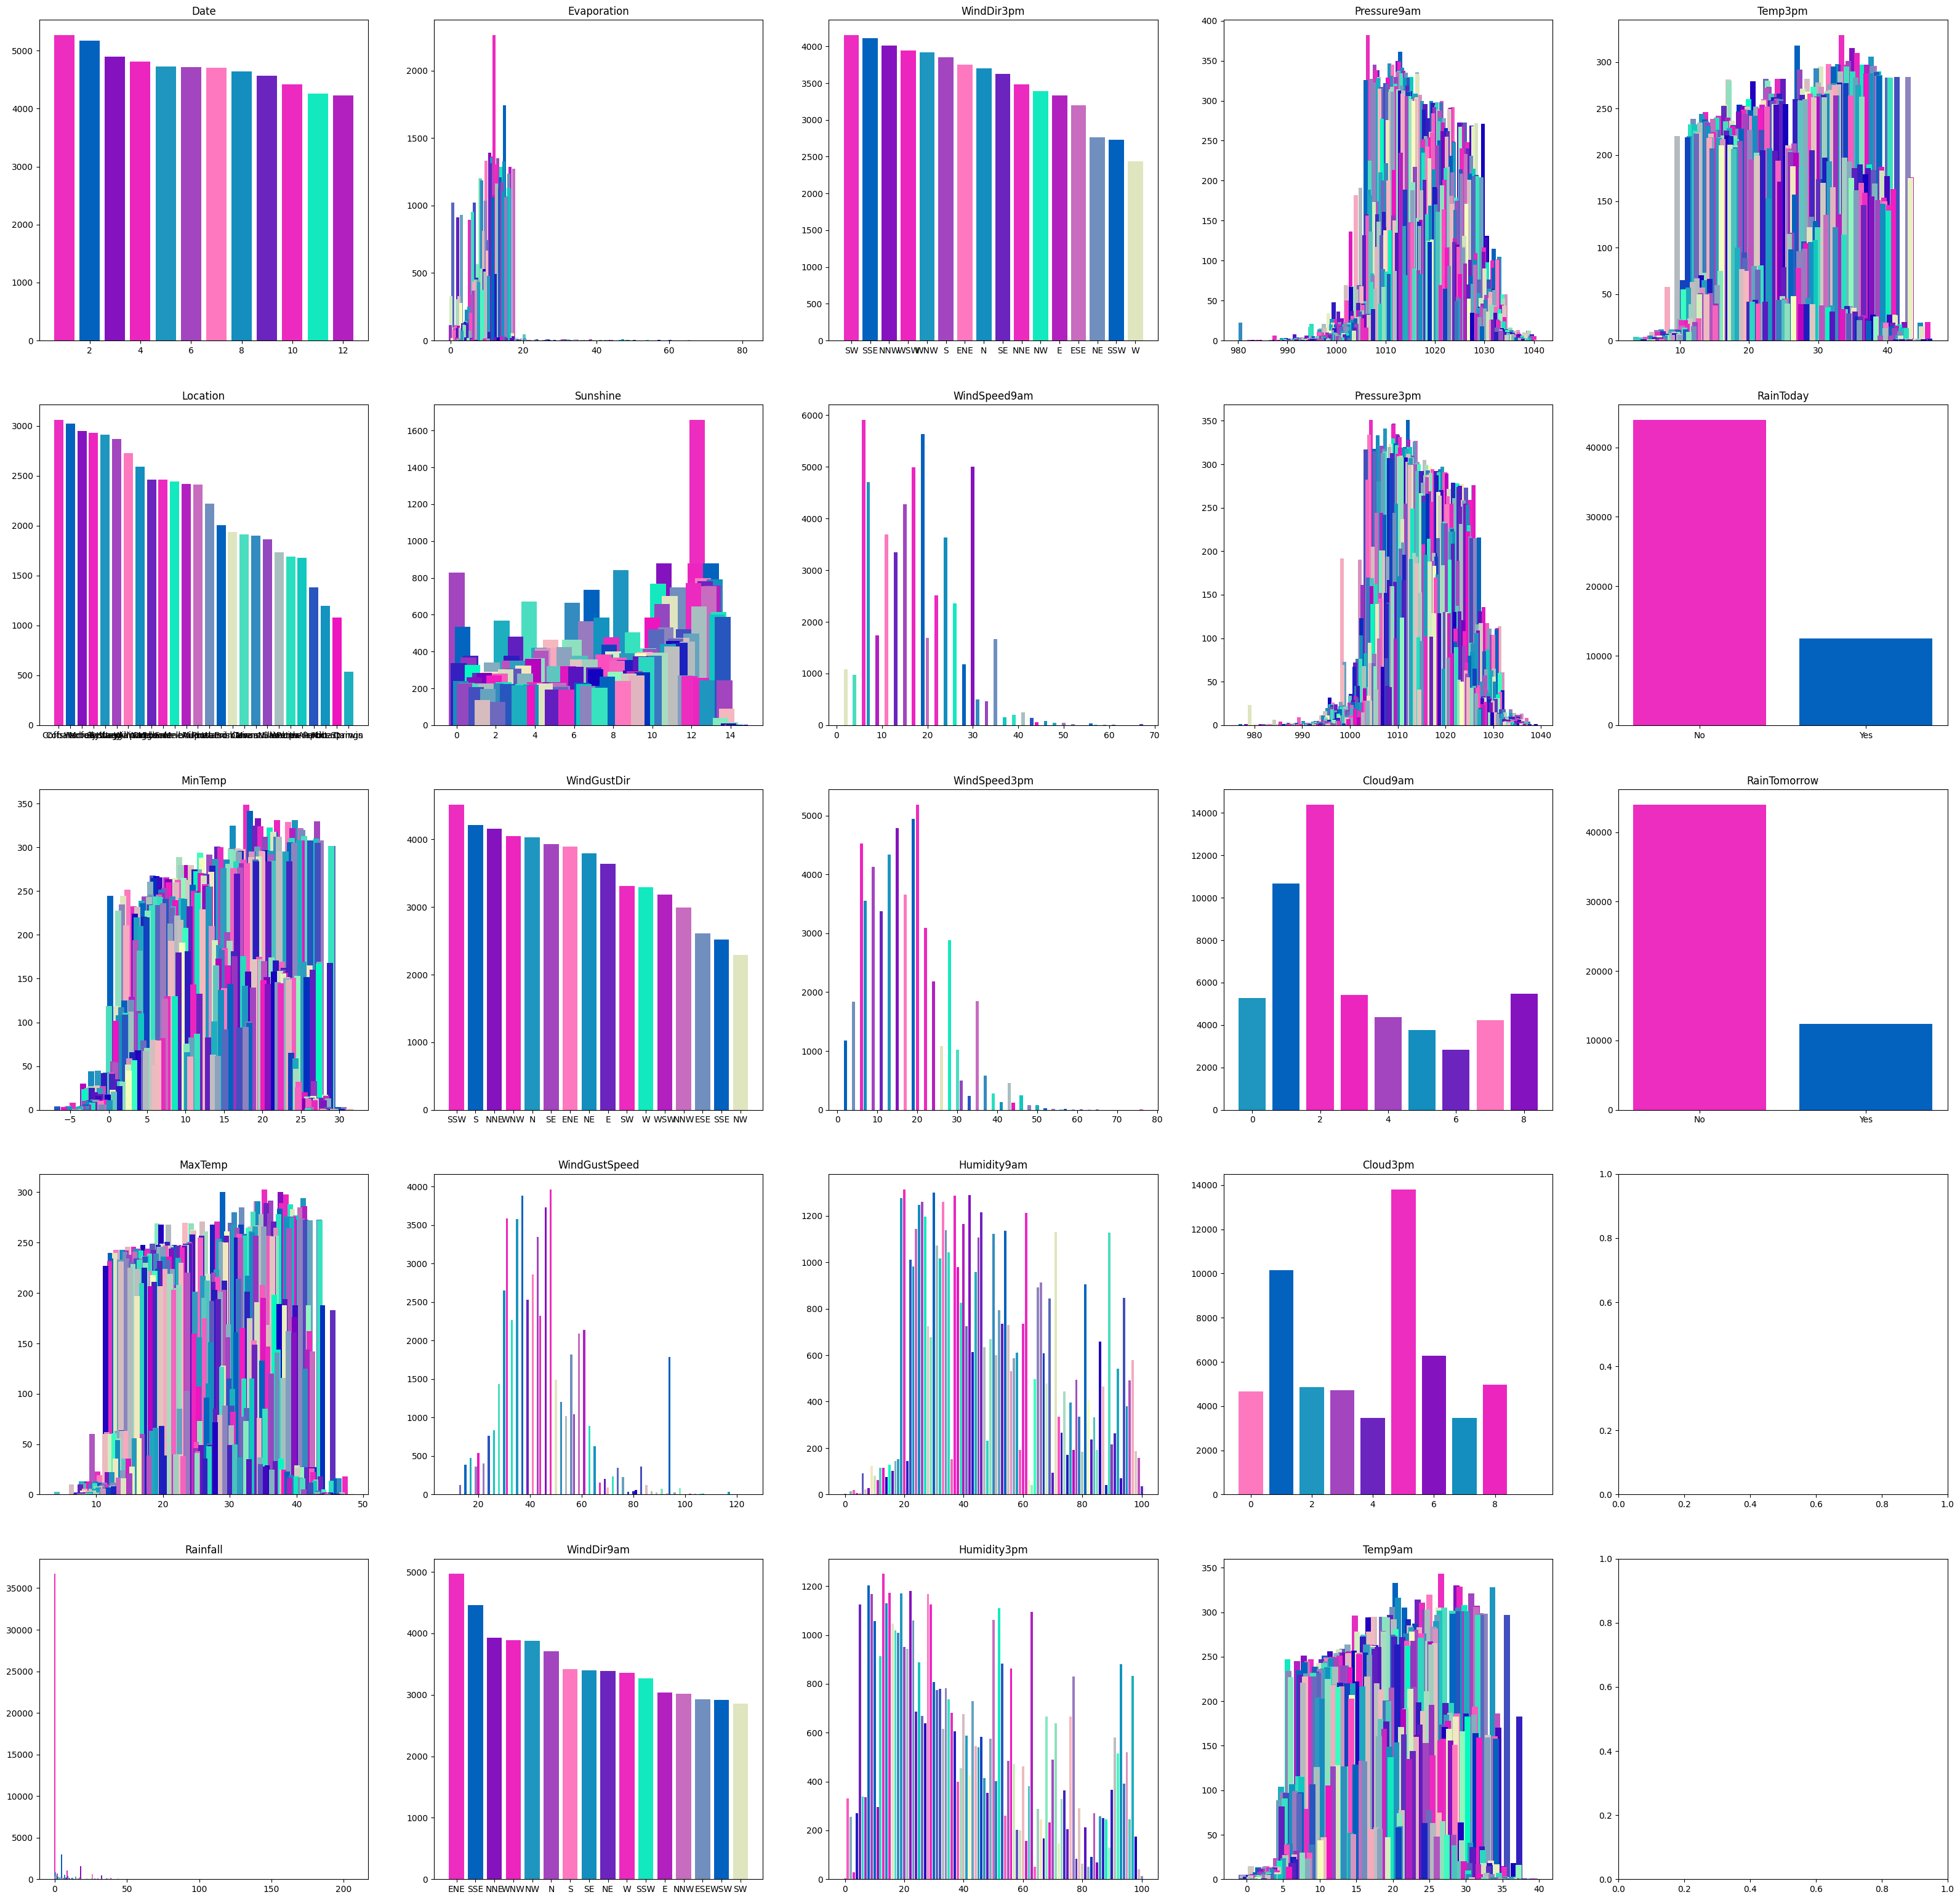

In [31]:
#define number of rows and columns for subplots
nrow=5
ncol=5

# make a list of all dataframes 
fig, axes = plt.subplots(nrow, ncol)
fig.set_size_inches(40, 40)
fig.set_dpi(100)
# columns= []
# color_map = [[{i: random.random()} for i in range(33)] for j in range(12)]
# my_colors = [(x/10.0, x/100.0, x/10.0) for x in range(10)]

my_colors = [ (random.random(),random.random(),0.75) for I  in range(100)]



# plot counter
for inx,col in enumerate(my_data.columns):
    axes[inx%nrow,inx//nrow].set_title(col)
    axes[inx%nrow,inx//nrow].bar(my_data[col].unique(),height=my_data[col].value_counts(),color=my_colors)


In [32]:
male_heart = my_data[(my_data['RainTomorrow'] == 'Yes') & (my_data['RainToday'] == 'Yes')]['RainToday'].count()
female_heart = my_data[(my_data['RainTomorrow'] == 'Yes') & (my_data['RainToday'] == 'No')]['RainToday'].count()

male_normal = my_data[(my_data['RainTomorrow'] != 'Yes') & (my_data['RainToday'] == 'Yes')]['RainToday'].count()
female_normal = my_data[(my_data['RainTomorrow'] != 'Yes') & (my_data['RainToday'] == 'No')]['RainToday'].count()


heart_df = pd.DataFrame({'RainTomorrow':[male_normal,male_heart],'RainToday':[0,1]})
norm_df = pd.DataFrame({'RainTomorrow':[female_normal,female_heart],'RainToday':[0,1]})


heart = [male_heart,female_heart]
target = [male_normal,female_normal]
index = ['Yes','No']
df = pd.DataFrame({'RainToday': target,
                   'RainTomorrow': heart}, index=index)

df.plot.bar()


<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

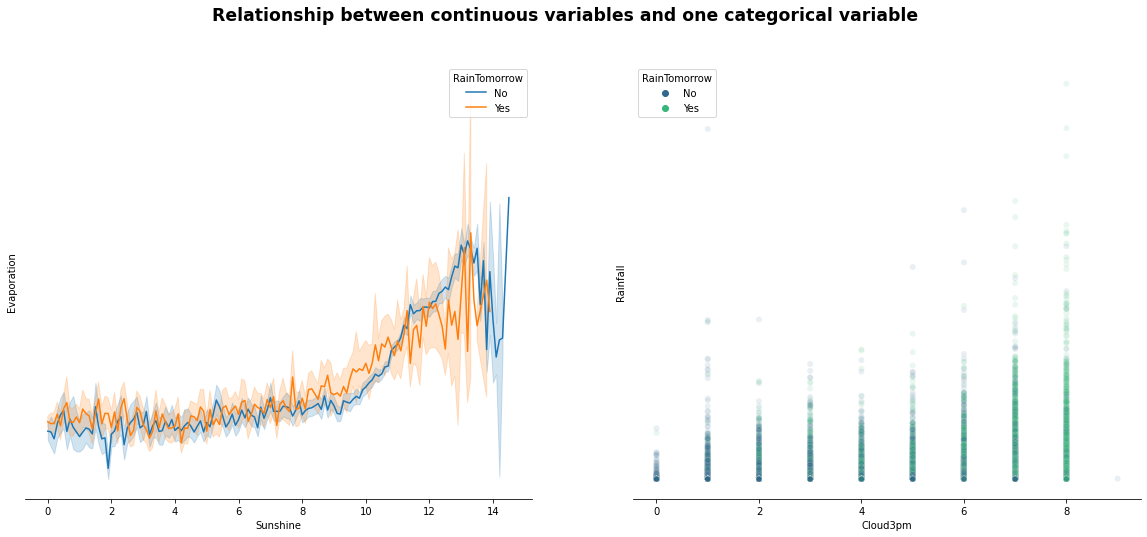

In [33]:
fig=plt.figure(figsize=(20,8),facecolor='white')

plt.suptitle('Relationship between continuous variables and one categorical variable',fontsize="xx-large",fontweight="bold")

gs=fig.add_gridspec(1,2)


ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)
    
sb.lineplot(data=my_data,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sb.scatterplot(data=my_data,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.1)



In [34]:
my_data.rename(columns={'RainTomorrow':'Target'},inplace=True)
my_data

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049       1    Cobar     17.9     35.2       0.0         12.0      12.3   
6050       1    Cobar     18.4     28.9       0.0         14.8      13.0   
6052       1    Cobar     19.4     37.6       0.0         10.8      10.6   
6053       1    Cobar     21.9     38.4       0.0         11.4      12.2   
6054       1    Cobar     24.2     41.0       0.0         11.2       8.4   
...      ...      ...      ...      ...       ...          ...       ...   
142298     6   Darwin     19.3     33.4       0.0          6.0      11.0   
142299     6   Darwin     21.2     32.6       0.0          7.6       8.6   
142300     6   Darwin     20.7     32.8       0.0          5.6      11.0   
142301     6   Darwin     19.5     31.8       0.0          6.2      10.6   
142302     6   Darwin     20.2     31.7       0.0          5.6      10.7   

       WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
6049           SSW           48.0        ENE  ...        20.0         13.0   
6050             S           37.0        SSE  ...        30.0          8.0   
6052           NNE           46.0        NNE  ...        42.0         22.0   
6053           WNW           31.0        WNW  ...        37.0         22.0   
6054           WNW           35.0         NW  ...        19.0         15.0   
...            ...            ...        ...  ...         ...          ...   
142298         ENE           35.0         SE  ...        63.0         32.0   
142299           E           37.0         SE  ...        56.0         28.0   
142300           E           33.0          E  ...        46.0         23.0   
142301         ESE           26.0         SE  ...        62.0         58.0   
142302         ENE           30.0        ENE  ...        73.0         32.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049         1006.3       1004.4       2.0       5.0     26.6     33.4   
6050         1012.9       1012.1       1.0       1.0     20.3     27.0   
6052         1012.3       1009.2       1.0       6.0     28.7     34.9   
6053         1012.7       1009.1       1.0       5.0     29.1     35.6   
6054         1010.7       1007.4       1.0       6.0     33.6     37.6   
...             ...          ...       ...       ...      ...      ...   
142298       1013.9       1010.5       0.0       1.0     24.5     32.3   
142299       1014.6       1011.2       7.0       0.0     24.8     32.0   
142300       1015.3       1011.8       0.0       0.0     24.8     32.1   
142301       1014.9       1010.7       1.0       1.0     24.8     29.2   
142302       1013.9       1009.7       6.0       5.0     25.4     31.0   

        RainToday  Target  
6049           No      No  
6050           No      No  
6052           No      No  
6053           No      No  
6054           No      No  
...           ...     ...  
142298         No      No  
142299         No      No  
142300         No      No  
142301         No      No  
142302         No      No  

[56420 rows x 23 columns]

In [35]:
le = preprocessing.LabelEncoder()
for col in my_data.columns:
    if my_data[col].dtypes == object:
        my_data[col] = le.fit_transform(my_data[col])
my_data

Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6049       1         4     17.9     35.2       0.0         12.0      12.3   
6050       1         4     18.4     28.9       0.0         14.8      13.0   
6052       1         4     19.4     37.6       0.0         10.8      10.6   
6053       1         4     21.9     38.4       0.0         11.4      12.2   
6054       1         4     24.2     41.0       0.0         11.2       8.4   
...      ...       ...      ...      ...       ...          ...       ...   
142298     6         6     19.3     33.4       0.0          6.0      11.0   
142299     6         6     21.2     32.6       0.0          7.6       8.6   
142300     6         6     20.7     32.8       0.0          5.6      11.0   
142301     6         6     19.5     31.8       0.0          6.2      10.6   
142302     6         6     20.2     31.7       0.0          5.6      10.7   

        WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
6049             11           48.0           1  ...         20.0         13.0   
6050              8           37.0          10  ...         30.0          8.0   
6052              5           46.0           5  ...         42.0         22.0   
6053             14           31.0          14  ...         37.0         22.0   
6054             14           35.0           7  ...         19.0         15.0   
...             ...            ...         ...  ...          ...          ...   
142298            1           35.0           9  ...         63.0         32.0   
142299            0           37.0           9  ...         56.0         28.0   
142300            0           33.0           0  ...         46.0         23.0   
142301            2           26.0           9  ...         62.0         58.0   
142302            1           30.0           1  ...         73.0         32.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6049         1006.3       1004.4       2.0       5.0     26.6     33.4   
6050         1012.9       1012.1       1.0       1.0     20.3     27.0   
6052         1012.3       1009.2       1.0       6.0     28.7     34.9   
6053         1012.7       1009.1       1.0       5.0     29.1     35.6   
6054         1010.7       1007.4       1.0       6.0     33.6     37.6   
...             ...          ...       ...       ...      ...      ...   
142298       1013.9       1010.5       0.0       1.0     24.5     32.3   
142299       1014.6       1011.2       7.0       0.0     24.8     32.0   
142300       1015.3       1011.8       0.0       0.0     24.8     32.1   
142301       1014.9       1010.7       1.0       1.0     24.8     29.2   
142302       1013.9       1009.7       6.0       5.0     25.4     31.0   

        RainToday  Target  
6049            0       0  
6050            0       0  
6052            0       0  
6053            0       0  
6054            0       0  
...           ...     ...  
142298          0       0  
142299          0       0  
142300          0       0  
142301          0       0  
142302          0       0  

[56420 rows x 23 columns]

<AxesSubplot:>

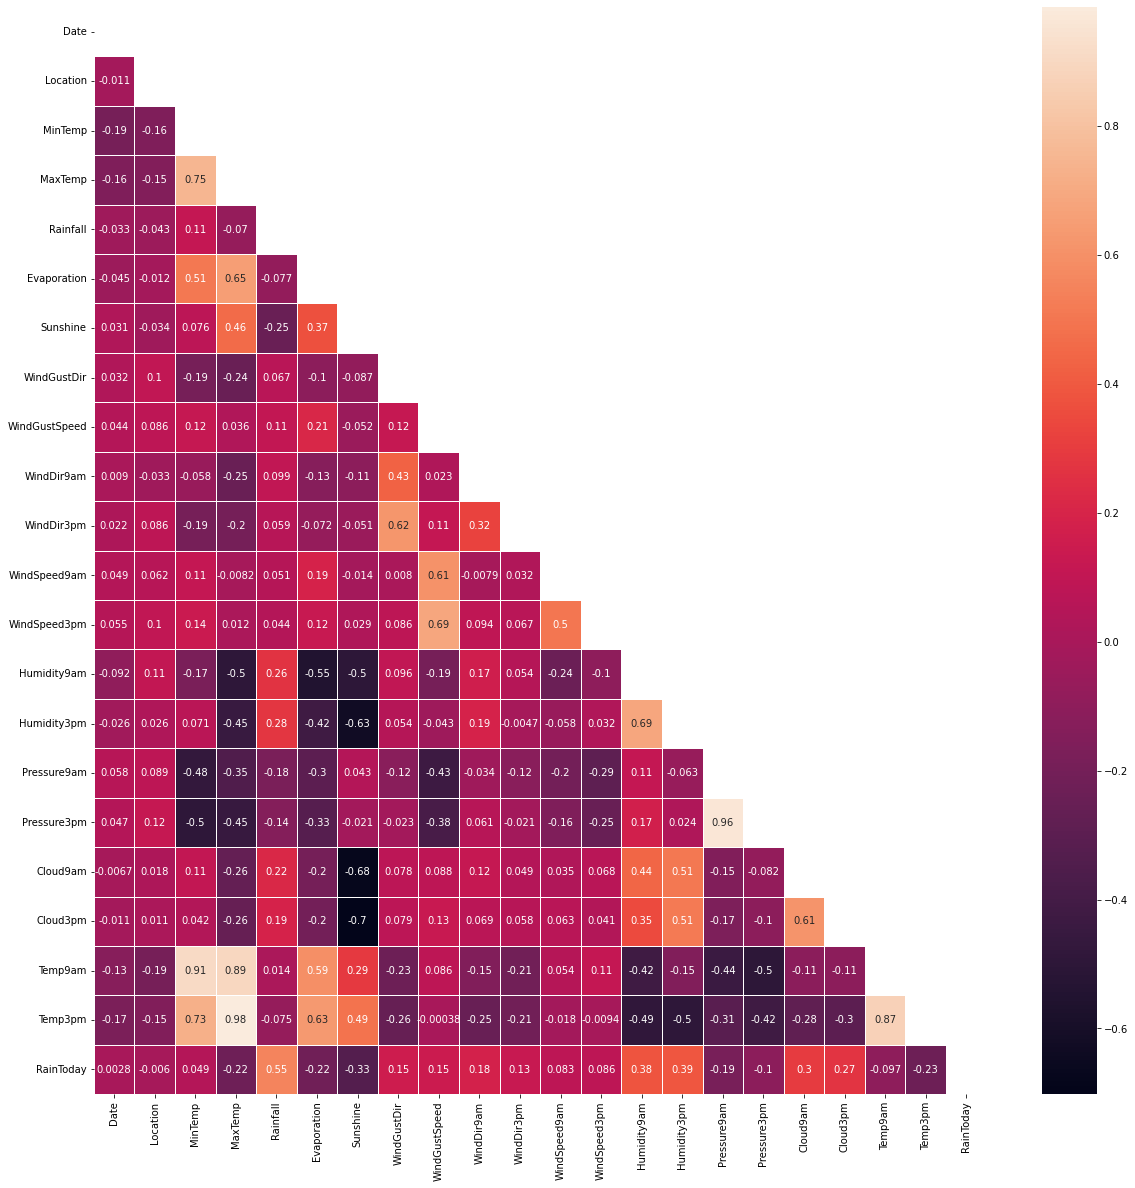

In [36]:

fig, ax = plt.subplots(figsize=(20,20))
mask = np.triu(np.ones_like(my_data.iloc[:,:-1].corr(), dtype=bool))
sb.heatmap(my_data.iloc[:,:-1].corr(),mask=mask, annot=True, linewidths=.5, ax=ax)


In [37]:
# corr = my_data.iloc[:,:-1].corr()
# my_data.iloc[:,:-1].corr()[abs(corr)>=0.5]

# Create correlation matrix
corr_matrix = corr = my_data.iloc[:,:-1].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]


# Drop features 
my_data.drop(to_drop, axis=1, inplace=True)
my_data



Date  Location  MinTemp  Rainfall  Sunshine  WindGustDir  \
6049       1         4     17.9       0.0      12.3           11   
6050       1         4     18.4       0.0      13.0            8   
6052       1         4     19.4       0.0      10.6            5   
6053       1         4     21.9       0.0      12.2           14   
6054       1         4     24.2       0.0       8.4           14   
...      ...       ...      ...       ...       ...          ...   
142298     6         6     19.3       0.0      11.0            1   
142299     6         6     21.2       0.0       8.6            0   
142300     6         6     20.7       0.0      11.0            0   
142301     6         6     19.5       0.0      10.6            2   
142302     6         6     20.2       0.0      10.7            1   

        WindGustSpeed  WindDir9am  Humidity9am  Pressure9am  RainToday  Target  
6049             48.0           1         20.0       1006.3          0       0  
6050             37.0          10         30.0       1012.9          0       0  
6052             46.0           5         42.0       1012.3          0       0  
6053             31.0          14         37.0       1012.7          0       0  
6054             35.0           7         19.0       1010.7          0       0  
...               ...         ...          ...          ...        ...     ...  
142298           35.0           9         63.0       1013.9          0       0  
142299           37.0           9         56.0       1014.6          0       0  
142300           33.0           0         46.0       1015.3          0       0  
142301           26.0           9         62.0       1014.9          0       0  
142302           30.0           1         73.0       1013.9          0       0  

[56420 rows x 12 columns]

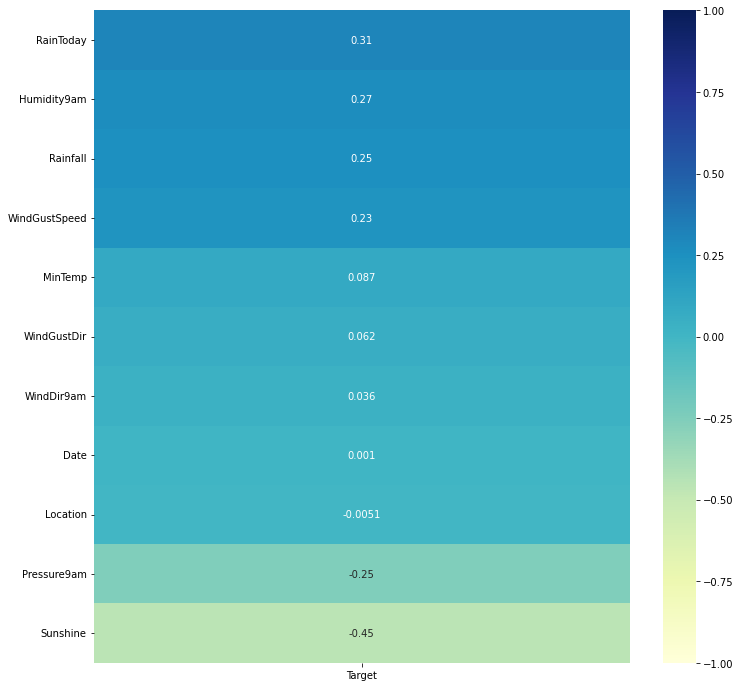

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(my_data.corr()[:-1][['Target']].sort_values('Target').tail(11),
vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [39]:
def get_mapper(model,X):
    mapper = dict()
    for key,val,_,_ in zip(X.columns[model.tree_.feature], model.tree_.threshold, 
                           model.tree_.children_left, model.tree_.children_right):
        mapper[key]= val
    return mapper

In [40]:
def run__eval_models(my_data,split_size=50,max_depth=5):

    #split between features and traget variables 
    X = my_data.iloc[:,:-1]
    y = my_data.iloc[:,-1]

    alpah_lst = np.arange(0.1,0.9,0.2)
    iter_num = 1
    model = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=max_depth,min_samples_split=split_size)


    nrow=2
    ncol=2

    # make a list of all dataframes 
    fig, axes = plt.subplots(nrow, ncol)
    fig.set_size_inches(18.5, 10.5)
    fig.set_dpi(100)
    columns= ['precision','accuracy','f1','RoC']


    #Use Stratified K fold to split train-test data
    for alpha in alpah_lst:

        model_accuracy = []
        model_precision = []
        model_f1 = []
        model_Roc = []


        new_model_accuracy = []
        new_model_precision = []
        new_model_f1 = []
        new_model_Roc = []
        print(alpha)

        skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            model.fit(X_train,y_train)
            y_pred = model.predict(X_test)
            model_accuracy.append(accuracy_score( y_test,y_pred))
            model_precision.append(precision_score(y_test, y_pred))
            model_f1.append(f1_score(y_test,y_pred))
            model_Roc.append(roc_auc_score(y_test,y_pred))


            mapper = get_mapper(model,X_train)
            y_pred = np.zeros((iter_num, *y_pred.shape))
            for index in range(iter_num):
                tmp = X_test.copy()
                for r_idx,row in X_test.iterrows():
                    for c_idx,feature_val in enumerate(row):
                        feature = tmp.columns[c_idx]
                        if feature in mapper and np.random.uniform(low=0.0, high=1.0, size=None) < alpha:
                            if tmp.at[r_idx,feature] > mapper[feature]:
                                tmp.at[r_idx,feature] = mapper[feature] * 1.01 if mapper[feature] < 0 else  mapper[feature] / 1.01
                            else: 
                                tmp.at[r_idx,feature] = mapper[feature] / 1.01 if mapper[feature] < 0 else  mapper[feature] * 1.01
                y_pred[index] = model.predict(tmp)
            y_pred = np.median(y_pred,axis=0).astype(int)
            new_model_accuracy.append(accuracy_score(y_test,y_pred))
            new_model_precision.append(precision_score(y_test, y_pred))
            new_model_f1.append(f1_score(y_test, y_pred))
            new_model_Roc.append(roc_auc_score(y_test, y_pred))


        axes[0,0].set_title('precision')
        axes[0,0].plot(new_model_precision,'--',label=str(alpha))
        axes[0,0].legend()

        axes[0,1].set_title('accuracy')
        axes[0,1].plot(new_model_accuracy,'--',label=str(alpha))
        axes[0,1].legend()

        axes[1,0].set_title('f1')
        axes[1,0].plot(new_model_f1,'--',label=str(alpha))
        axes[1,0].legend()

        axes[1,1].set_title('Roc')
        axes[1,1].plot(new_model_Roc,'--',label=str(alpha))
        axes[1,1].legend()


    #     #print(model_accuracy,model_precision)    
    #     print(f"mean accuracy: {np.asarray(model_accuracy).mean()}")
    #     print(f"mean precision: {np.asarray(model_precision).mean()}")
    #     print("-"*30)
    #     #print(new_model_accuracy,new_model_precision)    
    #     print(f"mean accuracy: {np.asarray(new_model_accuracy).mean()}")
    #     print(f"mean precision: {np.asarray(new_model_precision).mean()}")
    #     print("="*30)
    #     print(model_accuracy)

    axes[0,0].plot(model_precision)
    axes[0,1].plot(model_accuracy)
    axes[1,0].plot(model_f1)
    axes[1,1].plot(model_Roc)
    
    return model


0.1
0.30000000000000004
0.5000000000000001
0.7000000000000001


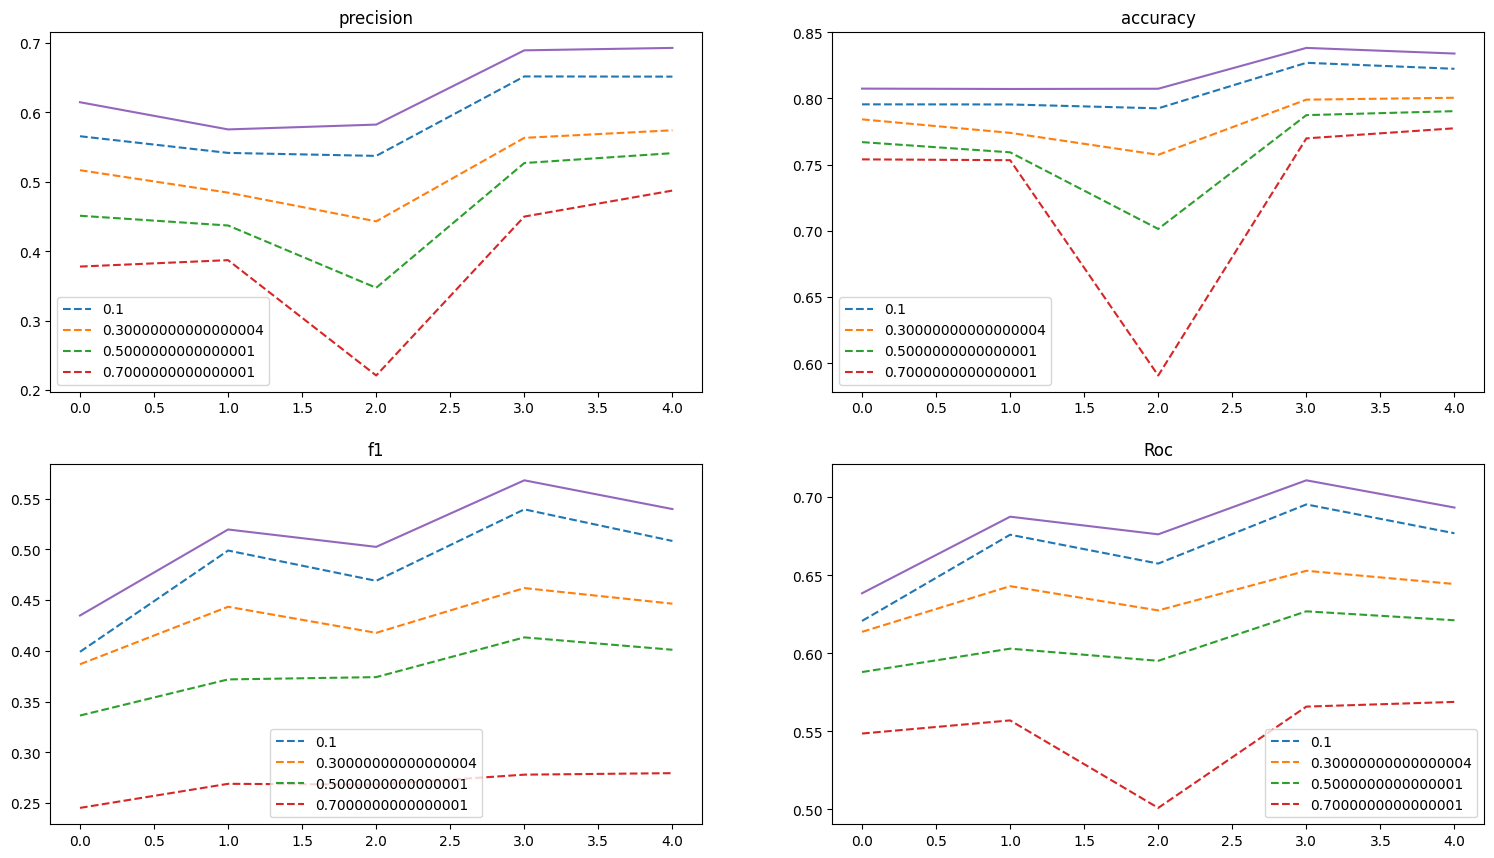

In [41]:
np.random.seed(10)
model = run__eval_models(my_data)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



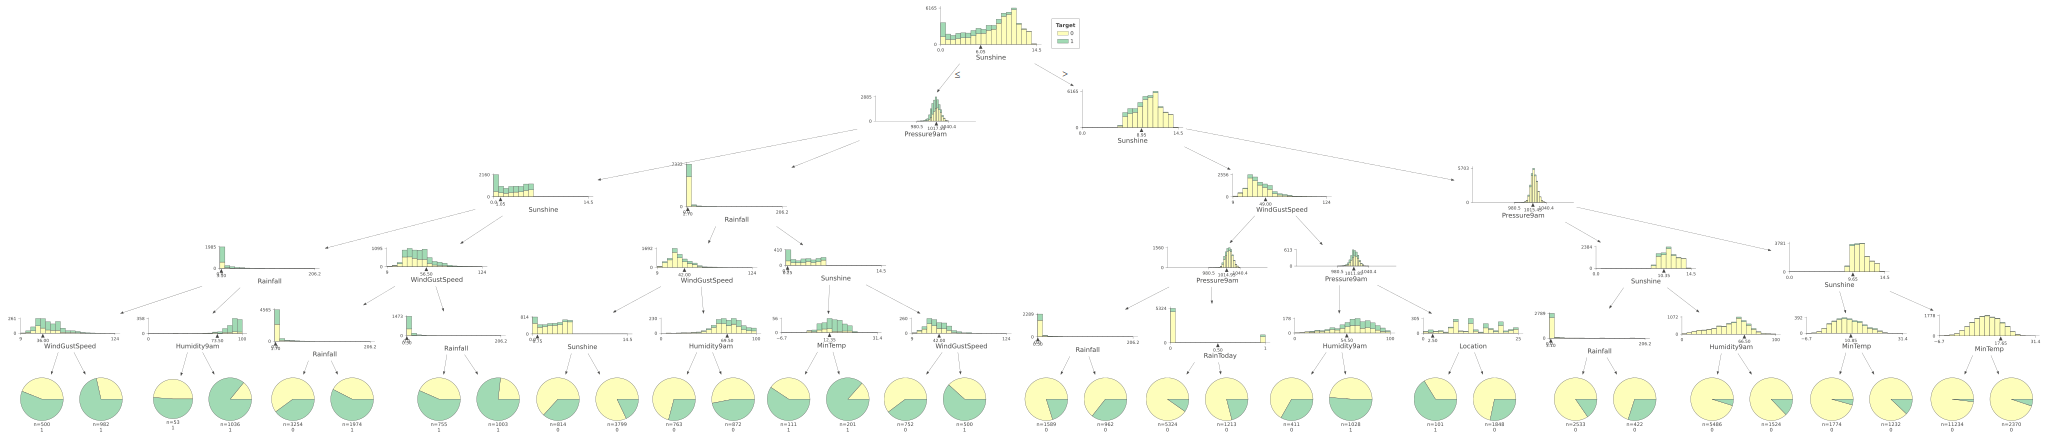

In [42]:
X = my_data.iloc[:,:-1]
y = my_data.iloc[:,-1]

viz = dtreeviz(model, X, y,
                target_name="Target",
                feature_names=my_data.columns,
                class_names=['0','1'])

viz

In [43]:
# my_data.drop(['ever_married','gender','Residence_type'],inplace= True,axis=1)
# np.random.seed(10)
# model = run__eval_models(my_data)